In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [2]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0
        
        elif wine_type == "white":
            number = 2
        
        
        
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data


red_wine = labelWine(6, "red", red_wine)  #labeling the wine as being good or bad for both white and red whites
white_wine = labelWine(6, "white",white_wine)     

wine = pd.concat([red_wine,white_wine], ignore_index=True) #combining the red and white wine dataset after labeling 


    
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


# Preprocessing

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Markdown

from sklearn.preprocessing import scale

from sklearn.preprocessing import normalize

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature) # scaling the features data

## Applying PCA

In [9]:
from sklearn.decomposition import PCA


#normalize features first
feature_norm = normalize(feature)
variance={'explained variance':[]}

#number of components to use for PCA
comp_num = 2

pca = PCA(n_components=comp_num)
pca.fit(feature_norm)
feature_PCA = pca.transform(feature_norm)


# Clustering the dataset into 4 clusters  (KMeans)
- The goal is to have the data group itself into good white wine, good red white wine, bad white wine and bad red wine
- good and bad wine will be determined by its quality rating

In [12]:
scores = {name: [] for name in ('auto', 'full', 'elkan')}
scores_scaled = {name: [] for name in ('auto', 'full', 'elkan')}
scores_PCA = {name: [] for name in ('auto', 'full', 'elkan')}

for algorithm in ('auto', 'full', 'elkan'): # test different seed values with different algorithms and check the ARI scores
    for seed in np.arange(0, 10):
        kmeans = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_scaled = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_PCA = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        
        
        kmeans.fit(feature)
        kmeans_scaled.fit(feature_scaled)
        kmeans_PCA.fit(feature_PCA)
        
        ARI_score = metrics.adjusted_rand_score(kmeans.labels_ ,labels)
        ARI_score_scaled = metrics.adjusted_rand_score(kmeans_scaled.labels_ ,labels)
        ARI_score_PCA = metrics.adjusted_rand_score(kmeans_PCA.labels_ ,labels)
        
        array = kmeans.labels_
        array_pca = kmeans_PCA.labels_
        
        scores[algorithm].append(ARI_score)
        scores_scaled[algorithm].append(ARI_score_scaled)
        scores_PCA[algorithm].append(ARI_score_PCA)
        
        print(algorithm, seed, ARI_score)

        


median_auto = np.median(np.array(scores['auto'])) # scores from non scaled features
median_full = np.median(np.array(scores['full']))
median_elkan = np.median(np.array(scores['elkan']))     

median_auto_scaled = np.median(np.array(scores_scaled['auto'])) # scores from scaled features
median_full_scaled = np.median(np.array(scores_scaled['full']))
median_elkan_scaled = np.median(np.array(scores_scaled['elkan']))  

median_auto_PCA = np.median(np.array(scores_PCA['auto'])) # scores from PCA reduced features
median_full_PCA = np.median(np.array(scores_PCA['full']))
median_elkan_PCA = np.median(np.array(scores_PCA['elkan']))  


display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**auto**|{median_auto:.4}|\n'
f'|**full**|{median_full:.4}|\n'
f'|**elkan**|{median_elkan:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores scaled|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_scaled:.4}|\n'
f'|**full**|{median_full_scaled:.4}|\n'
f'|**elkan**|{median_elkan_scaled:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores PCA|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_PCA:.4}|\n'
f'|**full**|{median_full_PCA:.4}|\n'
f'|**elkan**|{median_elkan_PCA:.4}|\n'))

auto 0 0.1790886139178354
auto 1 0.17916415799812466
auto 2 0.1792577499620072
auto 3 0.17901233887814302
auto 4 0.17902706339533264
auto 5 0.17919798644423574
auto 6 0.17892223680057928
auto 7 0.17919798644423574
auto 8 0.1795126908651767
auto 9 0.1792795183615587
full 0 0.1790886139178354
full 1 0.17916415799812466
full 2 0.1792577499620072
full 3 0.17901233887814302
full 4 0.17902706339533264
full 5 0.17919798644423574
full 6 0.17892223680057928
full 7 0.17919798644423574
full 8 0.1795126908651767
full 9 0.1792795183615587
elkan 0 0.1790886139178354
elkan 1 0.17916415799812466
elkan 2 0.1792577499620072
elkan 3 0.17901233887814302
elkan 4 0.17902706339533264
elkan 5 0.17919798644423574
elkan 6 0.17892223680057928
elkan 7 0.17919798644423574
elkan 8 0.1795126908651767
elkan 9 0.1792795183615587


|[]()|Median scores|
|---|---|
|**auto**|0.1792|
|**full**|0.1792|
|**elkan**|0.1792|


|[]()|Median scores scaled|
|---|---|
|**auto**|0.3223|
|**full**|0.3223|
|**elkan**|0.3223|


|[]()|Median scores PCA|
|---|---|
|**auto**|0.1906|
|**full**|0.1906|
|**elkan**|0.1906|


## results (kmeans)
- in regards to the algorithm selected for the kmeans testing it appears to not have an impact on the result as shown by the tables above
- the medians that we recieved after finding the ARI scores from 0-9 are 0.1792, this was unscaled
- after scaling the features we achieved a better ARI score of 0.3223

### Results (Kmeans) PCA
- PCA performed better than the base featureset, but worse than the scaled featureset
- They all performed fairly poorly. 

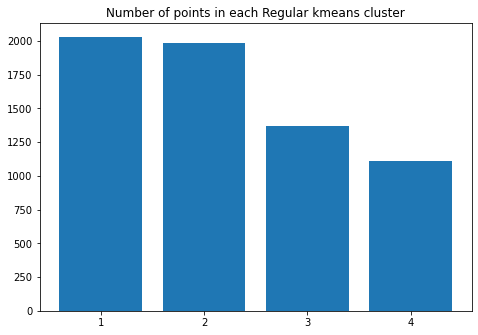

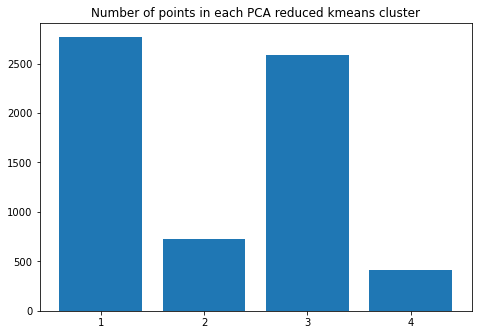

In [15]:
# plotting the number of points in each cluster 


zero = np.count_nonzero(array==0)
one = np.count_nonzero(array==1)
two = np.count_nonzero(array==2)
three = np.count_nonzero(array==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each Regular kmeans cluster")
plt.show()


#plotting number of points in each cluster For PCA reduced Data
zero = np.count_nonzero(array_pca==0)
one = np.count_nonzero(array_pca==1)
two = np.count_nonzero(array_pca==2)
three = np.count_nonzero(array_pca==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each PCA reduced kmeans cluster")
plt.show()




## bar graph
- this is a bar graph of the distribution of points in each of the cluster
- the clusters are suppose to represent good white wines, bad white wines, good red wines and bad red wines
- from the bar graph and data alone however we do not know what each cluster represents 


# DBSCAN
- test different eps values with different min_samples values and plot the results
- find the combination that provides the highest score 
- use scaled data to improve results

max value is: 0.32423995577726467
eps:  0.036000000000000004
min_samples:  160


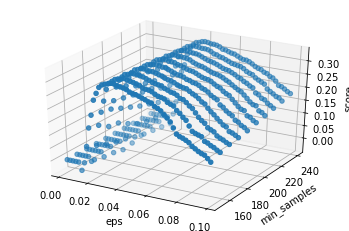

In [32]:
from sklearn.cluster import DBSCAN


xs = []
ys = []
zs = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
max_value = 0 
max_eps = -5
samples_ = -5

for eps in np.arange(0.002,0.1,0.002):  # testting different min_sample values with different eps and recording the best ARI scores 
        for samples in range(150, 250, 10):
            
            xs.append(eps)
            ys.append(samples)
            
            db = DBSCAN (eps = eps , min_samples = samples)
            db.fit(feature_PCA)
            
            ARI_score = metrics.adjusted_rand_score(db.labels_,labels)
            #print(ARI_score)
            zs.append(ARI_score)
            if ARI_score > max_value:
                max_value = ARI_score
                max_eps = eps
                samples_ = samples


            
print("max value is:", max_value)
print("eps: ", max_eps)
print("min_samples: ", samples_)


ax.scatter(xs, ys, zs)
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('score')

plt.show()    # plotting a 3d graph to compare the ARI score based on different eps and min_sample values using scaled features data


## Results (DBscan) With PCA reduction
- the data was tested using mutile eps and min_samples values
- Since the PCA data is normalized, it needed to be tested using much smaller values of eps than the regular feature set.
- Highest ARI Score acheived was 0.324, with eps=0.036 and min_samples=160
- These results are notable, because a higher ARI score was acheived than for the base Data set (0.235 with eps = 10 and min_samples = 200)

# agglomerative clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, RobustScaler

# split the labels and features
labels = wine['label']
features = wine.drop(['label'], axis = 1)
print(features.shape)
names = ['ward euclidean', 'complete euclidean', 'average euclidean', 'single euclidean',
        'complete l1', 'average l1', 'single l1', 'complete l2', 'average l2', 'single l2']

def scale_fit(scaler, features, labels):
    
    sc_features = features.copy()
    scaler.fit(sc_features)
    # need to transform the features
    sc_features = scaler.transform(sc_features)
    scores = aggclust_initial(sc_features, labels, 4)
    return scores

def aggclust_initial(features, labels, n_clust):
    scores = {name: [] for name in ('ward', 'complete', 'average', 'single', 'ward euclidean',
                                    'complete euclidean', 'average euclidean', 'single euclidean',
                                    'complete l1', 'average l1', 'single l1',
                                    'complete l2', 'average l2', 'single l2')}
    for linkage_mode in ('ward', 'complete', 'average', 'single'):
        for affinity in ('euclidean', 'l1', 'l2'):
            if linkage_mode == 'ward' and affinity != 'euclidean':
                print('skip l1 and l2 for ward')
            else:
                clust = AgglomerativeClustering(n_clusters = n_clust, affinity = affinity, 
                                                linkage = linkage_mode).fit(features)
                ARI_score = metrics.adjusted_rand_score(labels, clust.labels_)
                scores[linkage_mode + ' ' + affinity].append(ARI_score)
                scores[linkage_mode].append(ARI_score)
                print(f'AHC Affinity={affinity:9} Linkage mode={linkage_mode:8} ARI score = {ARI_score:.5}')
            
    return scores


# intitial results no scaling                
scores = aggclust_initial(features, labels, 4)

# scale the data
sc_features = scale(features, axis = 1)
print("\n \tNow Scaled")
# results with scaling
sc_scores = aggclust_initial(sc_features, labels, 4)
print("\n \tNow With PCA reduced data")
# with PCA reduced Data
PCA_scores = aggclust_initial(feature_PCA,labels,4)

(6497, 12)
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.16636
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = -0.011263
AHC Affinity=l1        Linkage mode=complete ARI score = 0.22167
AHC Affinity=l2        Linkage mode=complete ARI score = -0.011263
AHC Affinity=euclidean Linkage mode=average  ARI score = 0.00052832
AHC Affinity=l1        Linkage mode=average  ARI score = 0.00081336
AHC Affinity=l2        Linkage mode=average  ARI score = 0.00052832
AHC Affinity=euclidean Linkage mode=single   ARI score = 0.0001167
AHC Affinity=l1        Linkage mode=single   ARI score = 0.0001167
AHC Affinity=l2        Linkage mode=single   ARI score = 0.0001167

 	Now Scaled
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.22149
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.16296
AHC Affinity=l1        Linkage mode=complete ARI score = 0.27574
AHC Affinity=l2

In [37]:
# scale with different methods.
mm_scaler = MinMaxScaler()
n_scaler = Normalizer()
r_scaler = RobustScaler()


# transform the data and fit a model with that data
print("\n \tNow Scaled Min Max")
mm_scores = scale_fit(mm_scaler, features, labels)
print("\n \tNow Scaled Normalizer")
n_scores = scale_fit(n_scaler, features, labels)
print("\n \tNow Scaled RobustScaler")
r_scores = scale_fit(r_scaler, features, labels)


 	Now Scaled Min Max
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.24038
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.00037606
AHC Affinity=l1        Linkage mode=complete ARI score = 0.16938
AHC Affinity=l2        Linkage mode=complete ARI score = 0.00037606
AHC Affinity=euclidean Linkage mode=average  ARI score = 0.00015839
AHC Affinity=l1        Linkage mode=average  ARI score = 0.0025051
AHC Affinity=l2        Linkage mode=average  ARI score = 0.00015839
AHC Affinity=euclidean Linkage mode=single   ARI score = 0.00015839
AHC Affinity=l1        Linkage mode=single   ARI score = 0.00015839
AHC Affinity=l2        Linkage mode=single   ARI score = 0.00015839

 	Now Scaled Normalizer
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.26439
skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.28553
AHC Affinity=l1        Linkage mode=complete ARI score

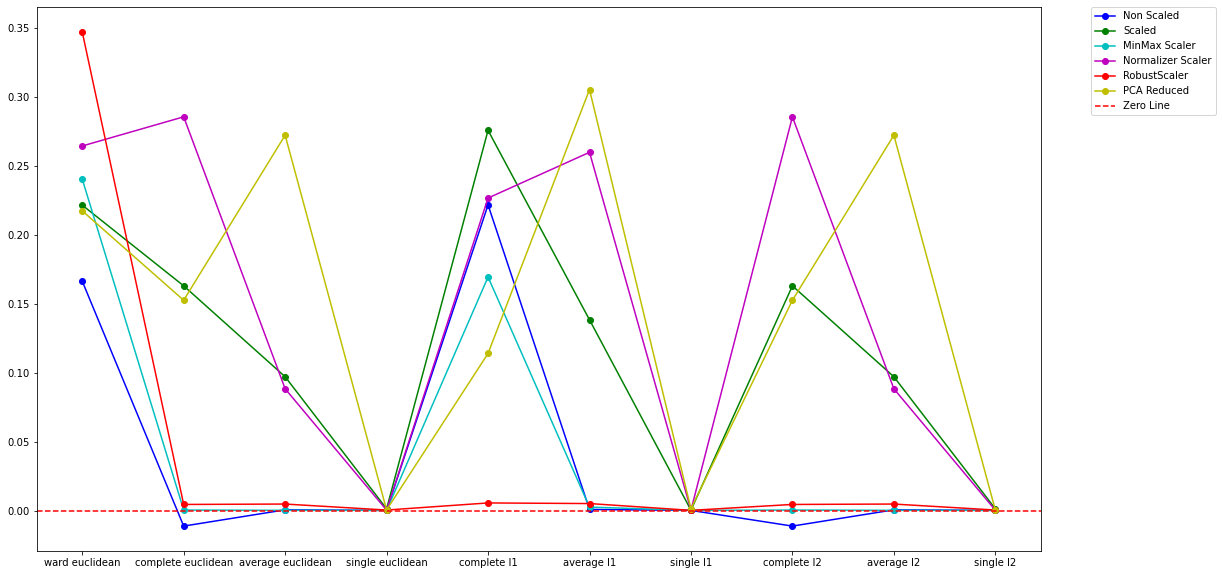

In [39]:
# setup data to display results

def setup_chart_data(score_lst, names):
    values = []
    for name in names:
        values.append(score_lst[name][0])
    return values
        
values = setup_chart_data(scores, names)
sc_values = setup_chart_data(sc_scores, names)
mm_values = setup_chart_data(mm_scores, names)
n_values = setup_chart_data(n_scores, names)
r_values = setup_chart_data(r_scores, names)
PCA_values = setup_chart_data(PCA_scores, names)

    
# plot the data  
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.plot(names, values, 'b', marker='o', label = 'Non Scaled')
plt.plot(names, sc_values, 'g', marker='o', label = 'Scaled')
plt.plot(names, mm_values, 'c', marker='o', label = 'MinMax Scaler')
plt.plot(names, n_values, 'm', marker='o', label = 'Normalizer Scaler')
plt.plot(names, r_values, 'r', marker='o', label = 'RobustScaler')
plt.plot(names, PCA_values, 'y', marker='o', label = 'PCA Reduced')


plt.axhline(0, c='r', linestyle='--', label= 'Zero Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### Results with PCA
- When we visualize the results we see that the PCA reduced data, in general does not perform much better or worse than any other type of data.  
- Overall the PCA reduced data worked best with linkage = 'average' and affinity = 'l1'. 
- The PCA reduced data did not outperfomrm the previous best performing model, which used complete l1 with the data scaled with the min max scaler.

In [42]:
for k,v in PCA_scores.items():
    print(k, v)

ward [0.21735973243275836]
complete [0.1525106893156234, 0.11393884657965732, 0.1525106893156234]
average [0.2722042519257175, 0.30530434191753747, 0.2722042519257175]
single [0.00045792614207232785, 0.0012968621406729802, 0.00045792614207232785]
ward euclidean [0.21735973243275836]
complete euclidean [0.1525106893156234]
average euclidean [0.2722042519257175]
single euclidean [0.00045792614207232785]
complete l1 [0.11393884657965732]
average l1 [0.30530434191753747]
single l1 [0.0012968621406729802]
complete l2 [0.1525106893156234]
average l2 [0.2722042519257175]
single l2 [0.00045792614207232785]


### Create a Dendogram
- This will help us see the clusters that exist within our models based on the type of data that we use 

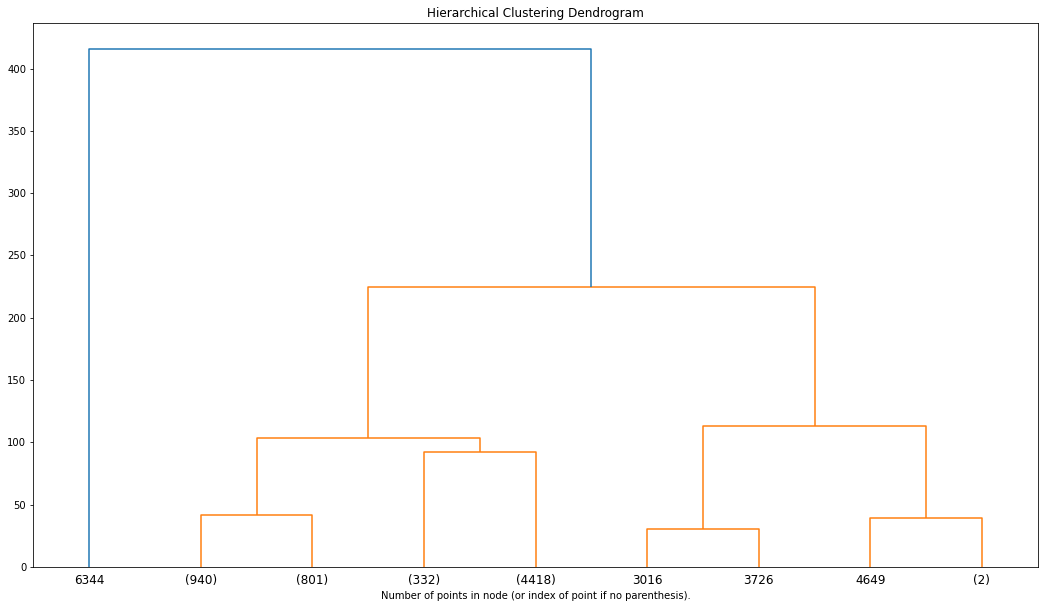

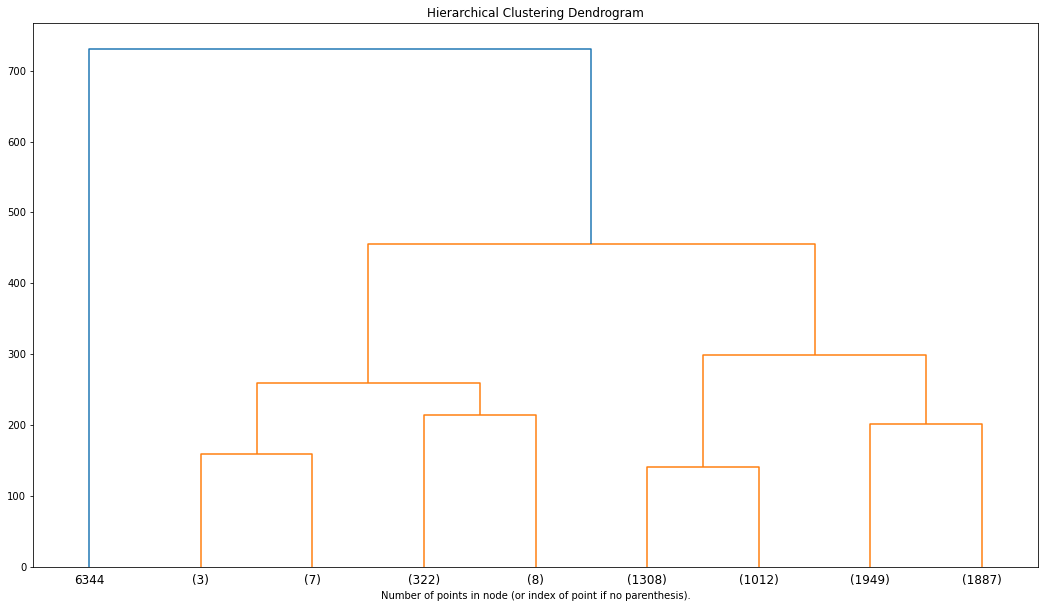

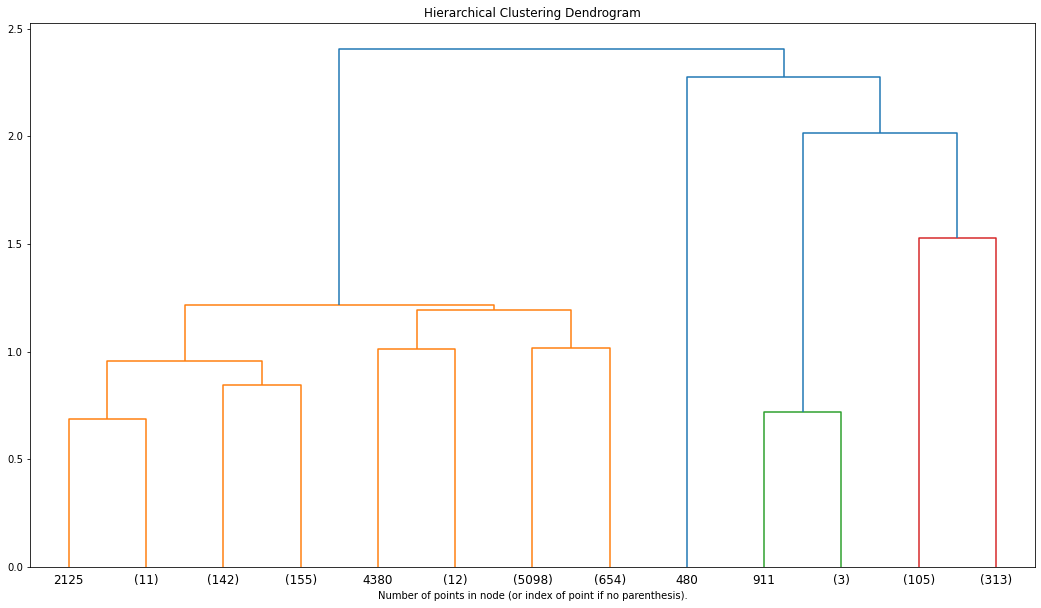

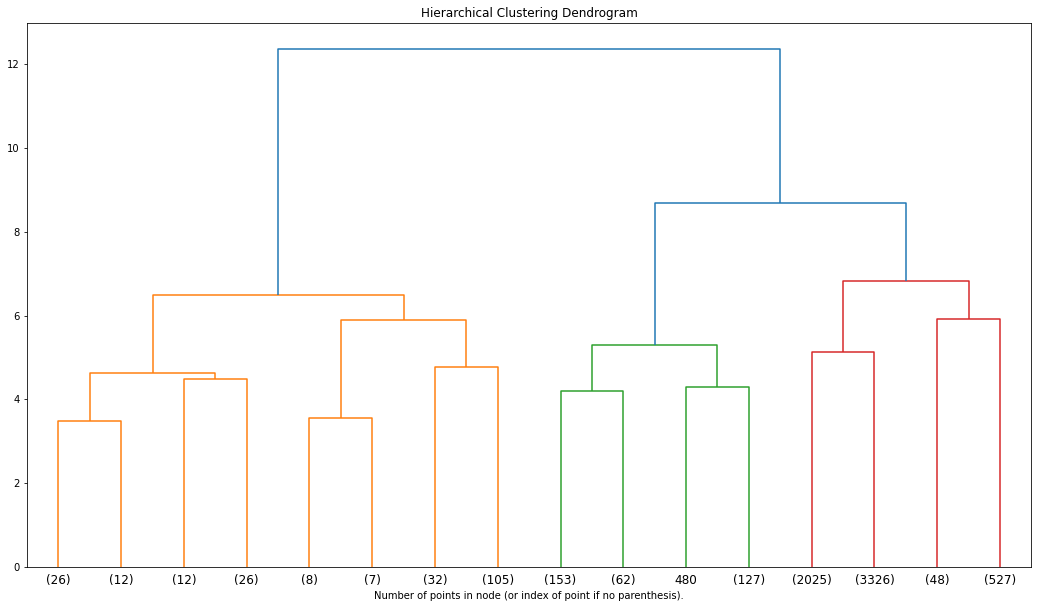

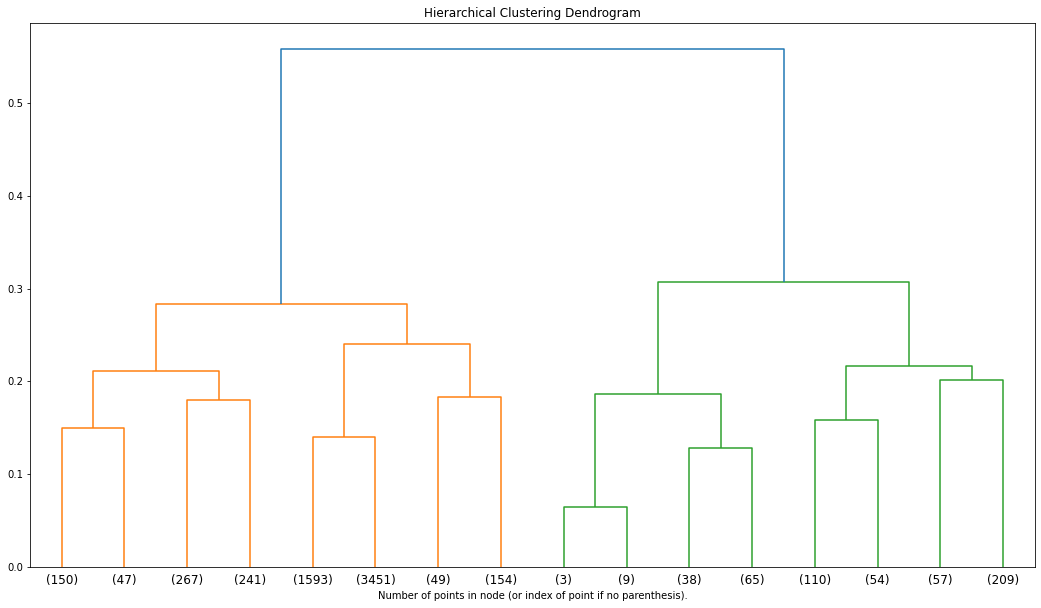

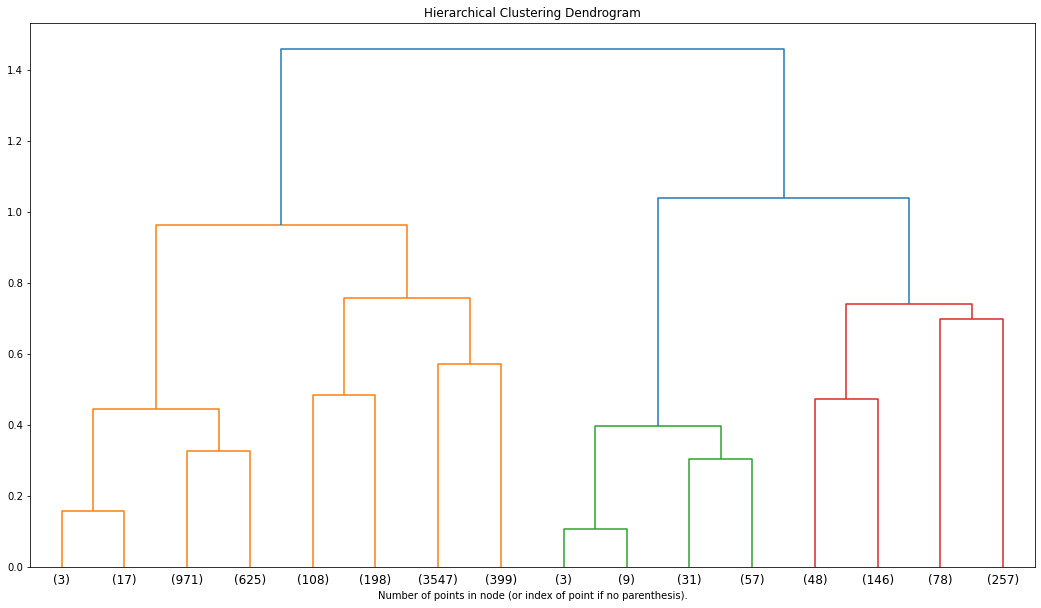

In [43]:
from scipy.cluster.hierarchy import dendrogram
# code taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def setup_dendogram(features, model):
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    

    
# setting distance_threshold=0 ensures we compute the full tree.
# create a model to view dendogram with the raw data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'euclidean')

# create a model to view dendogram with the scaled data
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'complete', affinity = 'l1')

model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'l1')
# create dendograms to compare the models cluster distances
setup_dendogram(features, model)
setup_dendogram(features, model2)
setup_dendogram(sc_features, model)
setup_dendogram(sc_features, model2)
setup_dendogram(feature_PCA, model)
setup_dendogram(feature_PCA, model3)




This dendogram shows us the arrangement of the clusters. We can see that the greatest difference would occur if we tried to group the wines into two clusters. This makes sense as we did initially have two separate groups of wine, red and white. Our goal was to see if the wines can be separated into 4 clusters. Good Red, Bad Red, Good White and Bad White. The dendogram shows us that our features do not provide us with 4 well defined groups. A group of three or two would provide us with clusters with greater distance between the groups. 

### Create visualizations based on the scores and sc_scores arrays
- Our fist observation is that scaling the data did not provide any improvement in the clustering results. Our best scores were from the raw feature data. Scaling the data worked better when it came to the complete and average l1 method, but did not perform better than the best methods with the raw data.
- We can see that no single method worked better to group the samples into 4 clusters. The average linkage method with the eculidean or the l2 affinity worked the best. Still this only provided us with about a 30% success rate in clustering the data. This result is not suprising based on the what we saw with the dendogram above. 

### PCA Reduced feature set observations
-PCA reduced data performed about average overall. 
-The PCA reduced data was the best performing for the average l1 method, but did not perform better than the other datasets for the other methods.

# final results 
- for kmeans clustering we got the best results when we used scaled values, we achieved an ARI score of 0.3223
- for dbscan clustering our best results was achieved using scaled data and having eps = 10 and min_samples = 200, we achieved a ARI score of 0.235
- for aglomerative clustering our best performing model used complete l1 with the data scaled wit the min max scaler, the ARI score that we achieved was 0.38971

# Final Results (PCA)
- For Kmeans Clustering, PCA did slightly outperforms the base featureset, however does not outperform the scaled featureset
- For DBScans Clustering, PCA actually performed the best out of all featuresets that were used
- For agglomerative clustering, PCA did not perform significantly better or worse than other featuresets